<h3 style="text-align:center">Logistic regression - 3 classes</h3>

In [1]:
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim
#import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_points(X, y, m="_"):
    class0 = X[np.argwhere(y==0)]
    class1 = X[np.argwhere(y==1)]
    class2 = X[np.argwhere(y==2)]
    plt.scatter([s[0][0] for s in class0], [s[0][1] for s in class0], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in class1], [s[0][1] for s in class1], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in class2], [s[0][1] for s in class2], s = 25, color = 'yellow', edgecolor = 'k',zorder=2, marker=m)

def plot_zone(X, y):
    class0 = X[np.argwhere(y==0)]
    class1 = X[np.argwhere(y==1)]
    class2 = X[np.argwhere(y==2)]    
    plt.scatter([s[0][0] for s in class0], [s[0][1] for s in class0], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker="+")
    plt.scatter([s[0][0] for s in class1], [s[0][1] for s in class1], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker="_" )  
    plt.scatter([s[0][0] for s in class2], [s[0][1] for s in class2], s = 25, color = 'yellow', edgecolor = 'k',zorder=2, marker="_" )  
    

def view(net):

    datamin = np.min(net.points, axis=0)
    datamax = np.max(net.points, axis=0)
    xmin, ymin = datamin
    xmax, ymax = datamax    
       
    border = []
    xList = np.linspace(xmin, xmax, 50)
    for x in xList:
        yList = np.linspace(ymin, ymax, 50)
        for y in yList:
            out = net.forward(torch.Tensor([[x,y]]))
            if(out[0][0].data.numpy()>0.5):    
                border.append([x,y,0])
            if(out[0][1].data.numpy()>0.5):    
                border.append([x,y,1])
            if(out[0][2].data.numpy()>0.5):    
                border.append([x,y,2])
                
    #print(border)
    border = np.array(border)
    solutionX = border[:, [0,1]]
    solutionT = border[:, [2]]
    plot_zone(solutionX, solutionT)

    plot_points(net.points, net.target,m="o")  

In [3]:
import pandas as pd
data = np.array([
    [1,10,0],
    [3,10,1],
    [1.8,2.0,2],
    [0,6,0],
    [-1,-1,1],
    [-2,10,2],
])

data = pd.read_csv('data1.csv', header=None)
data = data.reset_index().to_numpy()
data = data[:,[1,2,3]]
#print(data)

tensor(0.0062, grad_fn=<MeanBackward1>)


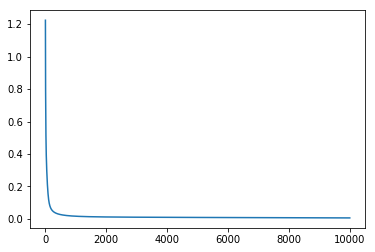

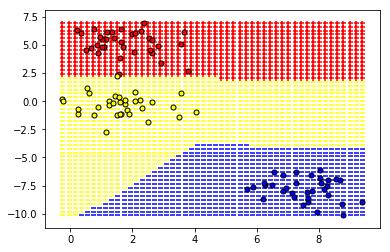

In [12]:
#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#rectified linear unit
def ReLU(input):
    return input.clamp(min=0)

def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

# Loss (cross entropy) error function
#def error(output, target):
#    return -target * torch.log(output) - (1-target) * torch.log(1-output)

def error(y, t):
    #print(y,y.type())
    #print(t,t.type())
     
    #replace 0,1,2
    c0 = torch.where(t==0, torch.Tensor([1,0,0]), torch.Tensor([0]))
    c1 = torch.where(t==1, torch.Tensor([0,1,0]), torch.Tensor([0]))
    c2 = torch.where(t==2, torch.Tensor([0,0,1]), torch.Tensor([0]))
    c = c0+c1+c2
    #filter outputs (remain only target, other turned to 0)
    all = y*c
    #sum rows (get rid of zeros by summing rows)
    sum = torch.sum(all,dim=1)
    #ce / every point
    ce_points = -torch.log(sum)
    #mean of ce of all points
    return torch.mean(ce_points)


#https://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss
#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
#criterion = torch.nn.CrossEntropyLoss()

#self.fc1 - fully connected

def train2(self, data, epochs = 100, alpha=0.01):
    
    self.epochs = epochs
    self.alpha = alpha        

    self.points = data[:, [0,1]]
    self.target = data[:, [2]]
    self.T = torch.from_numpy(net.target)
    self.features = torch.from_numpy(net.points).float()   
    
    self.lossHistory = []

    # Optimizers require the parameters to optimize and a learning rate
    optimizer = optim.SGD(self.parameters(), lr=self.alpha)    
    
    for i in range(epochs):
        output = self.forward(self.features)
        loss = error(output,self.T)
        #loss = criterion(output[0], torch.Tensor([1,0,0]))
        #print(loss)
        
        self.lossHistory.append(loss)

        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()        
        
        #print('Before backward pass: \n', self[0].weight.grad)
        loss.backward()
        #print('After backward pass: \n', self[0].weight.grad)

        # Take an update step and few the new weights
        optimizer.step()
        
#        with torch.no_grad():
#            self.hidden1.weight -= self.alpha * self.hidden1.weight.grad
#            self.hidden2.weight -= self.alpha * self.hidden2.weight.grad
#            self.output.weight -= self.alpha * self.output.weight.grad
#            self.hidden1.bias -= self.alpha * self.hidden1.bias.grad
#            self.hidden2.bias -= self.alpha * self.hidden2.bias.grad
#            self.output.bias -= self.alpha * self.output.bias.grad
        
            # Manually zero the gradients after updating weights
#            self.hidden1.weight.grad.zero_() 
#            self.hidden2.weight.grad.zero_()
#            self.output.weight.grad.zero_()
#            self.hidden1.bias.grad.zero_()
#            self.hidden2.bias.grad.zero_()
#            self.output.bias.grad.zero_()

class NN3(nn.Module):
    def __init__(self):
        torch.manual_seed(1)
        
        super().__init__()
        
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)        
        self.output = nn.Linear(10, 3)
        
        #self.relu = ReLU
        self.relu = nn.ReLU()
        #self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)        

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)  
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x        
        

class NN2(nn.Module):
    def __init__(self):
        torch.manual_seed(1) # Set the random seed so things are predictable
        
        #tracks the architecture and provides methods and attributes
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(2, 10)
        # Inputs to hidden layer linear transformation
        self.hidden2 = nn.Linear(10, 10)        
        # Output layer, 3 units - one for each class
        self.output = nn.Linear(10, 3)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.sigmoid(x)  
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x


def train(self, data, epochs = 100, alpha=0.01):   
    
    self.epochs = epochs
    self.alpha = alpha        
        
    self.lossHistory = []

    for i in range(epochs):
        loss = self.error(self.forward(self.features),self.T)
            
        self.lossHistory.append(loss)
           
        loss.backward()
           
        with torch.no_grad():
            self.W1 -= self.alpha * self.W1.grad
            self.W2 -= self.alpha * self.W2.grad
            self.W3 -= self.alpha * self.W3.grad
            self.B1 -= self.alpha * self.B1.grad
            self.B2 -= self.alpha * self.B2.grad
            self.B3 -= self.alpha * self.B3.grad

            # Manually zero the gradients after updating weights
            self.W1.grad.zero_()
            self.W2.grad.zero_()
            self.W3.grad.zero_()
            self.B1.grad.zero_()
            self.B2.grad.zero_()
            self.B3.grad.zero_()
               
class NN:
    def __init__(self, data):
        torch.manual_seed(1) # Set the random seed so things are predictable

        self.points = data[:, [0,1]]
        self.target = data[:, [2]]

        self.T = torch.from_numpy(self.target)#.double()
        self.features = torch.from_numpy(self.points).float()  #.double()  #.float()           
        
        self.activation = sigmoid
        self.activation2 = softmax
        self.error = error
        #self.error = criterion
        
        n_input = self.features.shape[1]    
        n_hidden1 = 10                 
        n_hidden2 = 10
        n_output = 3                  
        
        self.W1 = Variable(torch.randn(n_input,   n_hidden1, dtype=torch.float), requires_grad=True)
        self.W2 = Variable(torch.randn(n_hidden1, n_hidden2, dtype=torch.float), requires_grad=True)
        self.W3 = Variable(torch.randn(n_hidden2, n_output, dtype=torch.float),  requires_grad=True)
        
        self.B1 = Variable(torch.randn(1, n_hidden1, dtype=torch.float), requires_grad=True)
        self.B2 = Variable(torch.randn(1, n_hidden2, dtype=torch.float), requires_grad=True)        
        self.B3 = Variable(torch.randn(1, n_output, dtype=torch.float), requires_grad=True)        
    
    def forward(self,features):
        h1     = self.activation(torch.mm(features, self.W1) + self.B1)
        h2     = self.activation(torch.mm(h1, self.W2) + self.B2)
        output = self.activation2(torch.mm(h2, self.W3) + self.B3)
        return output

    
                
#net = NN(data) 
#net.train = train
#net.train(net,data,epochs=10000,alpha=0.01) 
#------------------------------------------------------------------
#net = NN2()
#net.train = train2
#net.train(net,data,epochs=10000,alpha=0.05)
#------------------------------------------------------------------
net = NN3()
net.train = train2
net.train(net,data,epochs=10000,alpha=0.05)

print(net.lossHistory[len(net.lossHistory)-1])
plt.plot(net.lossHistory)
plt.show()

view(net)

In [5]:
#view(net)